## By Arnab Datta

## Business Analytics - Super Store Data
Analysis of profits to discover scope of business tuning to increase profit rate. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the data

In [2]:
#loading the data as a pandas dataframe

data = pd.read_csv('SampleSuperstore.csv')

In [3]:
#checking the the overall view of data
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#checking on the mathematical descriptions of numeric data available 
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
#column info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
data.shape

(9994, 13)

### Data cleaning 

In [8]:
#We can consider removing the country columns, considering there is ample location information based on city and state. 

data=data.drop('Country', axis=1)

In [9]:
#Necssary to find missing values to be handled. 

missing= pd.DataFrame(data.isnull().sum(), columns=['Number of missing values'])
missing

,Number of missing values
Ship Mode,0
Segment,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0
Quantity,0


No missing values, good thing. 

In [10]:
#To check if there exists any duplicate rows. If yes, we can delete them to eliminate data redundancy.

data.duplicated().value_counts()

False    9977
True       17
dtype: int64

'True' represents the rows that are duplicated. Thus there exists 17 duplicates rows to be handled.

In [11]:
#deleting all the duplicated by keeping only the first data of the duplicate group.

data = data.drop_duplicates(keep='first')
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
#checking if the duplicate deletions happened by comparing with previous dimensionality.
data.shape

(9977, 12)

In [13]:
# Removing outliers using Z-score
data['z-score'] = (data.Sales - data.Sales.mean())/data.Sales.std()

In [14]:
data_test1=data[data['z-score']<-3]
data_test1.shape

(0, 13)

No Z-score of less than -3 thus no outlier below the mean point. 

In [15]:
data_test2=data[data['z-score']>3]
data_test2.shape

(127, 13)

127 outliers violating mean and standard dev regulations above the mean point based on the Z-score threshold. These outliers need to be removed

In [16]:
data2=data[data['z-score']<3]
data2.shape

(9850, 13)

In [17]:
data2.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.051002
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.804512
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,-0.345553
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1.166272
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,-0.333131


### Data Visualizations

In [18]:
#calculating correlation between between features. 
data2.corr()

,Postal Code,Sales,Quantity,Discount,Profit,z-score
Postal Code,1.000000,-0.003567,0.015628,0.056970,-0.024498,-0.003567
Sales,-0.003567,1.000000,0.255492,-0.042059,0.271649,1.000000
Quantity,0.015628,0.255492,1.000000,0.010968,0.076370,0.255492
Discount,0.056970,-0.042059,0.010968,1.000000,-0.356073,-0.042059
Profit,-0.024498,0.271649,0.076370,-0.356073,1.000000,0.271649
z-score,-0.003567,1.000000,0.255492,-0.042059,0.271649,1.000000


Postal code does not hold good correlation with any feature and also it can be taken as an extension of state and city. Thus postal code can be dropped

In [19]:
data2=data2.drop('Postal Code', axis=1)

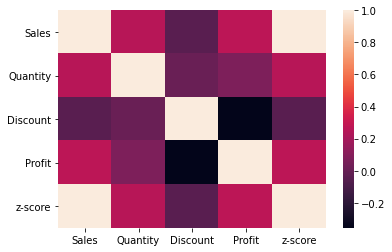

In [20]:
sns.heatmap(data2.corr())

In [21]:
#importing plotly for interactive plotting

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [22]:
data_city=data2.groupby('City').sum()
data_city.reset_index(inplace=True)
data_city.head()

,City,Sales,Quantity,Discount,Profit,z-score
0,Aberdeen,25.500,3,0.0,6.6300,-0.328109
1,Abilene,1.392,2,0.8,-3.7584,-0.366761
2,Akron,2729.986,65,7.5,-186.6356,-3.371924
3,Albuquerque,2220.160,65,0.8,634.0881,-1.606366
4,Alexandria,1355.520,79,0.0,235.3373,-3.361619


In [23]:
plt.figure(figsize=(20,6))
data_city.iplot(kind='bar',x='City',y=['Discount','Profit','Sales'])

<Figure size 1440x432 with 0 Axes>

From hovering over the plot, Independence to have higher level of both profit and sales. Similarly we can use these data for further analysis. Goin ahead, a similar amalysis graph is done based on states and more generic on the regions. 

In [24]:
data_state=data2.groupby('State').sum()
data_state.reset_index(inplace=True)
data_state.head()

,State,Sales,Quantity,Discount,Profit,z-score
0,Alabama,16470.6400,248,0.00,4327.6253,4.267460
1,Arizona,35282.0010,862,68.00,-3427.9246,-26.087533
2,Arkansas,11678.1300,240,0.00,4008.6871,-3.416275
3,California,373628.9315,7491,141.65,63482.8509,-128.622653
4,Colorado,29558.1330,688,56.90,-3127.8779,-19.397792


In [25]:
plt.figure(figsize=(20,6))
data_state.iplot(kind='bar',x='State',y=['Discount','Profit','Sales'])

<Figure size 1440x432 with 0 Axes>

In [26]:
data_region=data2.groupby('Region').sum()
data_region.reset_index(inplace=True)
data_region.head()

,Region,Sales,Quantity,Discount,Profit,z-score
0,Central,393481.5252,8631,553.62,15768.6436,-215.978162
1,East,506352.1500,10364,409.30,53808.4599,-222.463457
2,South,288320.9480,6041,235.65,37838.8593,-126.653820
3,West,592408.1675,11992,344.15,83863.0740,-214.746141


In [27]:
plt.figure(figsize=(20,6))
data_region.iplot(kind='bar',x='Region',y=['Discount','Profit','Sales'])

<Figure size 1440x432 with 0 Axes>

From the plots, we can observe some absurdities at certain points where the sales amount is considerably good but it has resulted in loss. Let's explore the reason. 

### Discount's influence on the sales and profit 

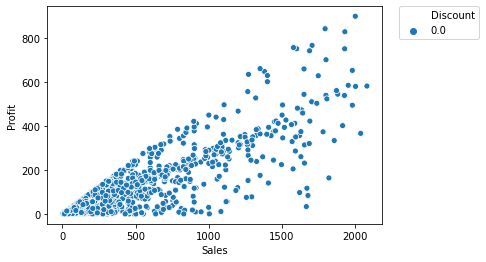

In [28]:
# Sales vs Profit when discount is 0.

data_d=data2[data2['Discount']==0]
sns.scatterplot(x='Sales',y='Profit',hue='Discount',data=data_d)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

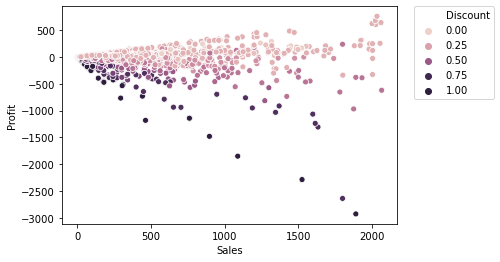

In [29]:
#Sales vs Profit when Discount in not 0.

data_nd=data2[data2['Discount']!=0]
sns.scatterplot(x='Sales',y='Profit',hue='Discount',data=data_nd)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

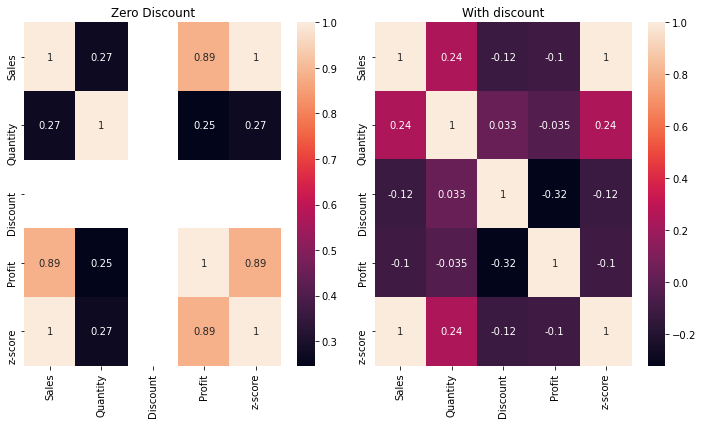

In [30]:
#corelations when discount is 0 and not 0..

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.heatmap(data_d.corr(),annot=True)
plt.title('Zero Discount')


plt.subplot(1, 2, 2)
sns.heatmap(data_nd.corr(), annot=True)
plt.title('With discount')

plt.tight_layout()
plt.show()

From the scatterplot and correlation plot we see that the relation between Sales and Profit is under positive correlation when no discount is applied, but the correlation is disturbed with discount being offered. So lets explore further. 

### Region based analysis

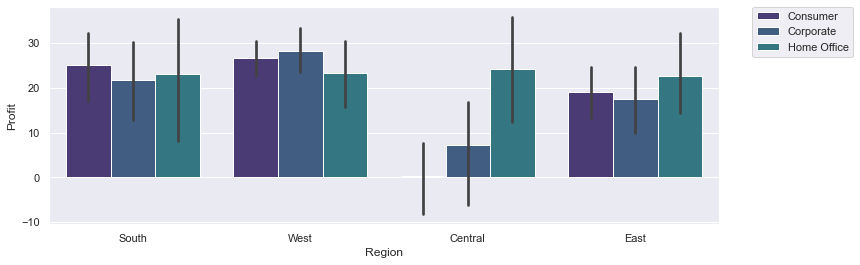

In [31]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = data2 , x = "Region",y = "Profit" ,hue = "Segment")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

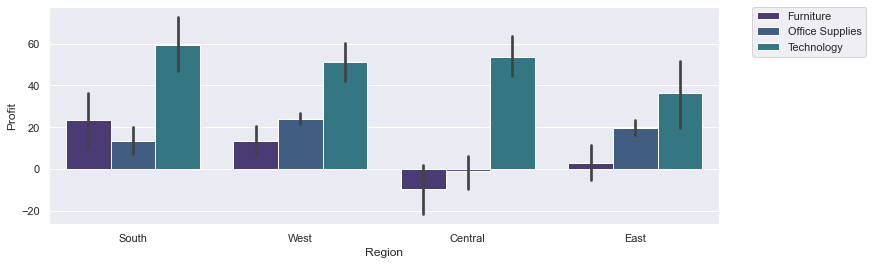

In [32]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = data2 , x = "Region",y = "Profit" ,hue = "Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

There is a loss in the furniture business in the central area, so lets look into it. 

In [33]:
# Obtaining data for central area.

data_central= data2[data2['Region']=='Central']
data_central

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-0.258671
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-0.364914
16,Standard Class,Consumer,Madison,Wisconsin,Central,Office Supplies,Storage,665.8800,6,0.00,13.3176,0.698599
21,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Art,19.4600,7,0.00,5.0596,-0.337793
22,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Appliances,60.3400,7,0.00,15.6884,-0.272251
...,...,...,...,...,...,...,...,...,...,...,...,...
9961,First Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,65.5840,2,0.20,23.7742,-0.263844
9962,First Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704,0.245810
9972,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Envelopes,99.5680,2,0.20,33.6042,-0.209358
9982,Standard Class,Consumer,Grand Rapids,Michigan,Central,Office Supplies,Paper,35.5600,7,0.00,16.7132,-0.311980


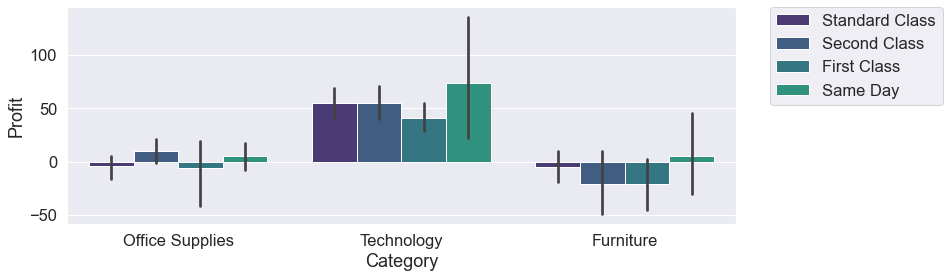

In [34]:
# Investing Further in central Region against the shipping mode.
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = data_central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Every shipping mode leads to a loss in the business of furnitures in the central region. 

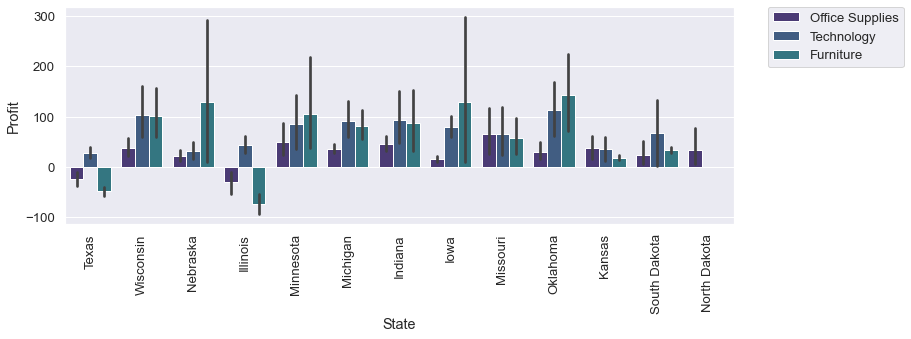

In [35]:
# Analysing on the central states
plt.figure(figsize = (12,4))
sns.set(font_scale=1.2, palette= "viridis")
ax=sns.barplot(data = data_central, x = "State",y = "Profit" ,hue = "Category")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We see Illinios and Texas affects the profit towards loss.

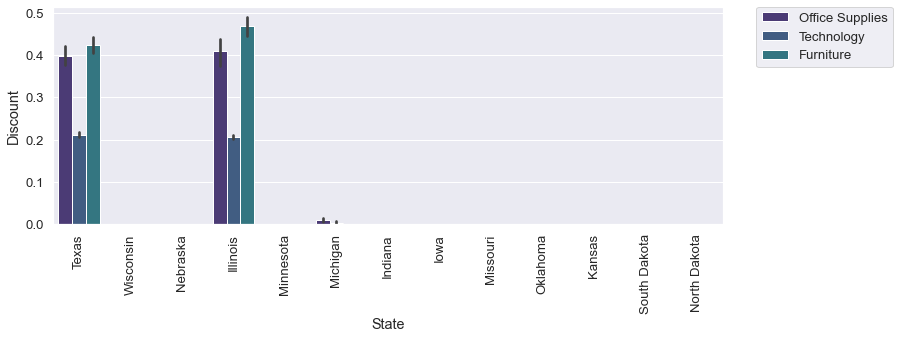

In [36]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.2, palette= "viridis")
ax=sns.barplot(data = data_central, x = "State",y = "Discount" ,hue = "Category")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We further notice Illinois and Texas are states being provided with good discounts thought its suffering loss. Lets check on the comparative sales.


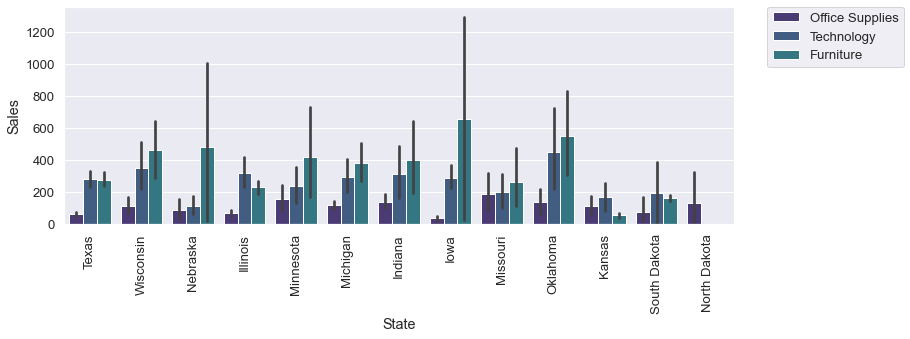

In [37]:
#sales in different states. 

plt.figure(figsize = (12,4))
sns.set(font_scale=1.2, palette= "viridis")
ax=sns.barplot(data = data_central, x = "State",y = "Sales" ,hue = "Category")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The states suffer loss and give discounts but that does not lead to boost in sales. so the conclusion says the discounts need to be cut off. 

### Category exploration

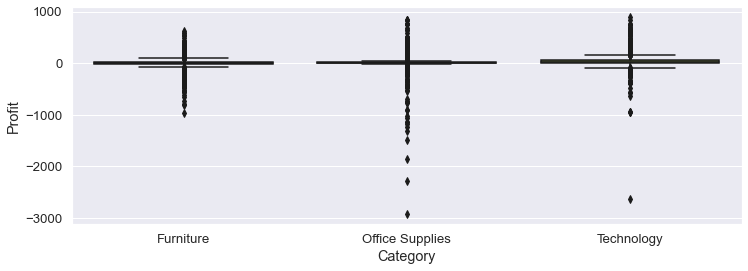

In [38]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.2, palette= "cubehelix")
sns.boxplot(data = data2, x = "Category",y = "Profit" )
plt.show()

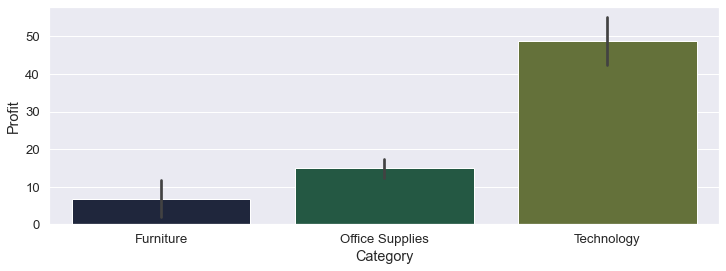

In [39]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.2, palette= "cubehelix")
sns.barplot(data = data2, x = "Category",y = "Profit" )
plt.show()

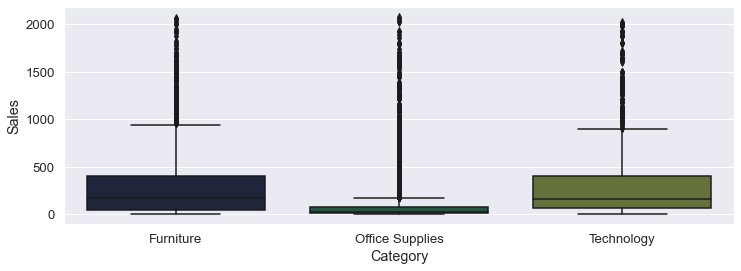

In [40]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.2, palette= "cubehelix")
sns.boxplot(data = data2, x = "Category",y = "Sales" )
plt.show()

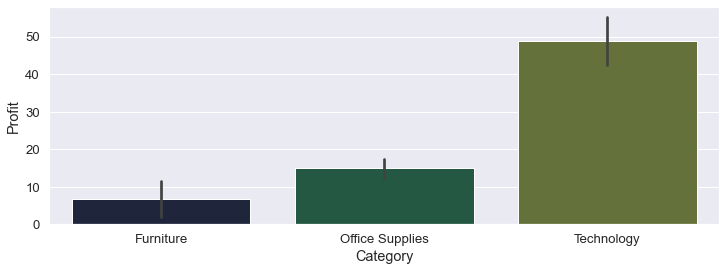

In [41]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.2, palette= "cubehelix")
sns.barplot(data = data2, x = "Category",y = "Profit" )
plt.show()

In conclusion, the technology business is doing well, but the profit and sales of furniture need to be looked into. And sales of office supplies is poor. 

### Furniture category exploration

In [42]:
#slicing the furniture data

data_furn= data2[data2['Region']=='Central']
data_furn

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-0.258671
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-0.364914
16,Standard Class,Consumer,Madison,Wisconsin,Central,Office Supplies,Storage,665.8800,6,0.00,13.3176,0.698599
21,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Art,19.4600,7,0.00,5.0596,-0.337793
22,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Appliances,60.3400,7,0.00,15.6884,-0.272251
...,...,...,...,...,...,...,...,...,...,...,...,...
9961,First Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,65.5840,2,0.20,23.7742,-0.263844
9962,First Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704,0.245810
9972,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Envelopes,99.5680,2,0.20,33.6042,-0.209358
9982,Standard Class,Consumer,Grand Rapids,Michigan,Central,Office Supplies,Paper,35.5600,7,0.00,16.7132,-0.311980


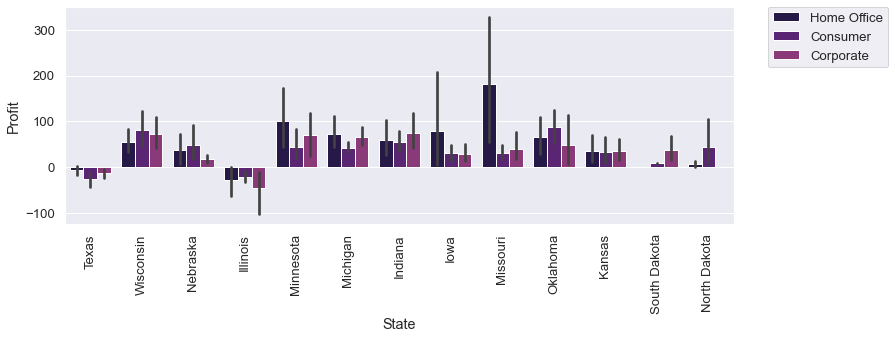

In [43]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.2, palette= "magma")
ax=sns.barplot(data = data_furn, x = "State",y = "Profit" ,hue = "Segment")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As expected the loss is added by high discount providing states- Illinois and Texas

In [44]:
# Furniture sales report for Illinois and Texas 
data_furn_loss = data2[ (data2['State']=='Illinois') | (data2['State']=='Texas')]

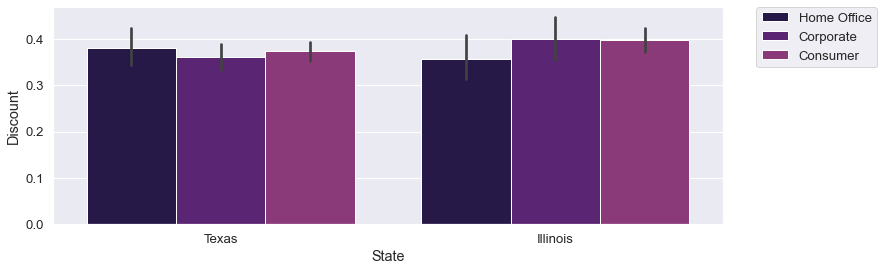

In [45]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.2, palette= "magma")
ax=sns.barplot(data = data_furn_loss, x = "State",y = "Discount", hue = "Segment")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Text(0.5, 1.0, 'Discount vs Sales')

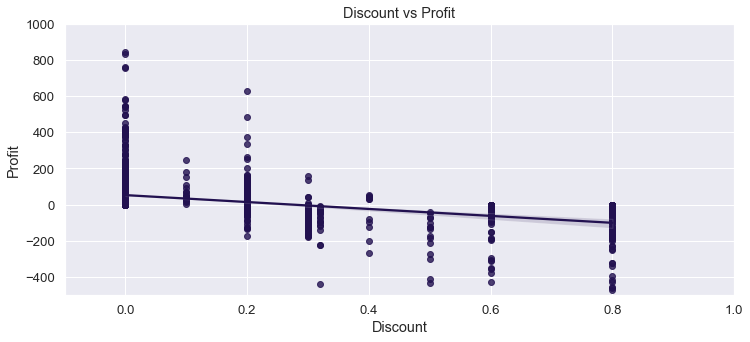

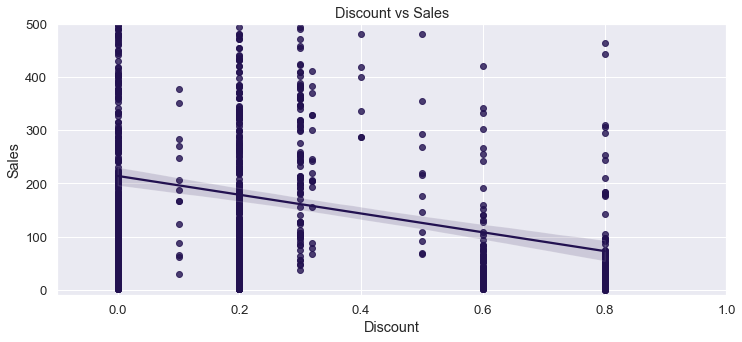

In [46]:
plt.figure(figsize=(12,5))
sns.regplot(data = data_furn, x = "Discount",y = "Profit")
plt.ylim(-500, 1000)
plt.xlim(-0.1,1)
plt.title("Discount vs Profit")

plt.figure(figsize=(12,5))
sns.regplot(data = data_furn, x = "Discount",y = "Sales")
plt.ylim(-10, 500)
plt.xlim(-0.1,1)
plt.title("Discount vs Sales")

From the collection of graphs we see that discount neither increases the sales nor profit.

### Final EDA

#### -> Regional

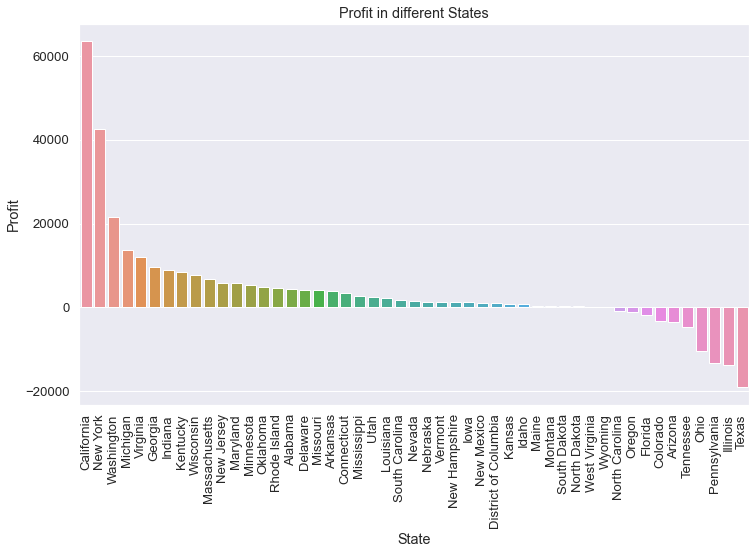

In [47]:
data_state_profit= data_state.sort_values(by=['Profit', 'Sales'], ascending=False)

plt.figure(figsize = (12,7))
sns.set(font_scale=1.2, palette= "hls")
ax=sns.barplot(data = data_state_profit, x = "State",y = "Profit")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Profit in different States')
plt.show()

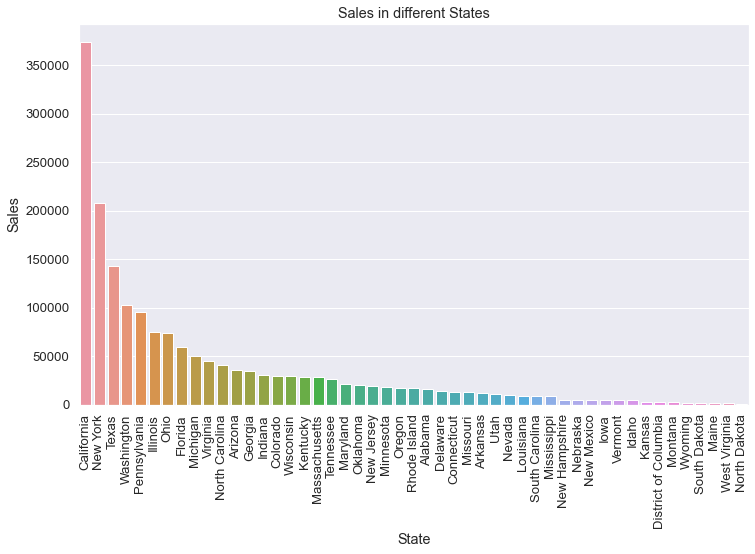

In [48]:
data_state_sales= data_state.sort_values(by=['Sales', 'Profit'], ascending=False)

plt.figure(figsize = (12,7))
sns.set(font_scale=1.2, palette= "hls")
ax=sns.barplot(data = data_state_sales, x = "State",y = "Sales")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Sales in different States')
plt.show()

#### -> Sub-Categorical

In [53]:
data_scategory=data.groupby('Sub-Category').sum()
data_scategory.reset_index(inplace=True)

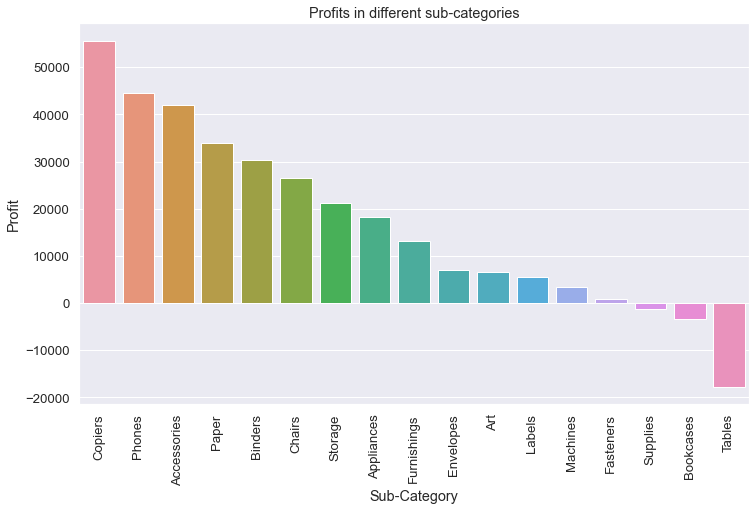

In [54]:
data_scategory_profit= data_scategory.sort_values(by=['Profit'], ascending=False)

plt.figure(figsize = (12,7))
sns.set(font_scale=1.2, palette= "tab10")
ax=sns.barplot(data = data_scategory_profit, x = "Sub-Category",y = "Profit")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Profits in different sub-categories')
plt.show()

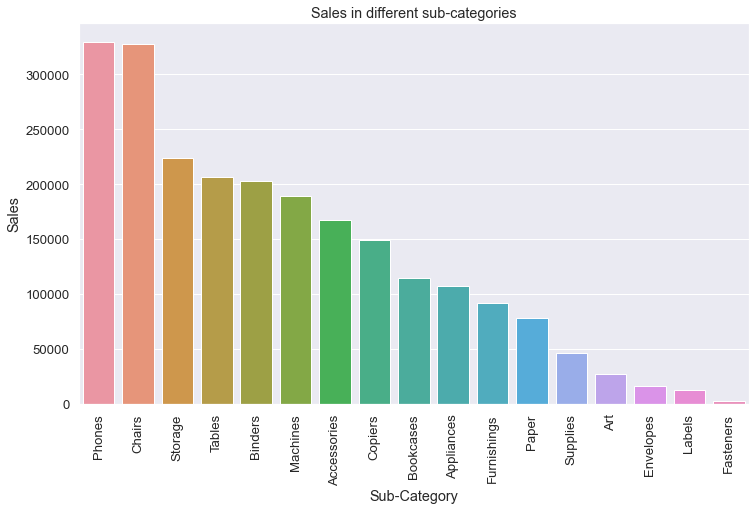

In [55]:
data_scategory_sales= data_scategory.sort_values(by=['Sales'], ascending=False)

plt.figure(figsize = (12,7))
sns.set(font_scale=1.2, palette= "tab10")
ax=sns.barplot(data = data_scategory_sales, x = "Sub-Category",y = "Sales")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Sales in different sub-categories')
plt.show()

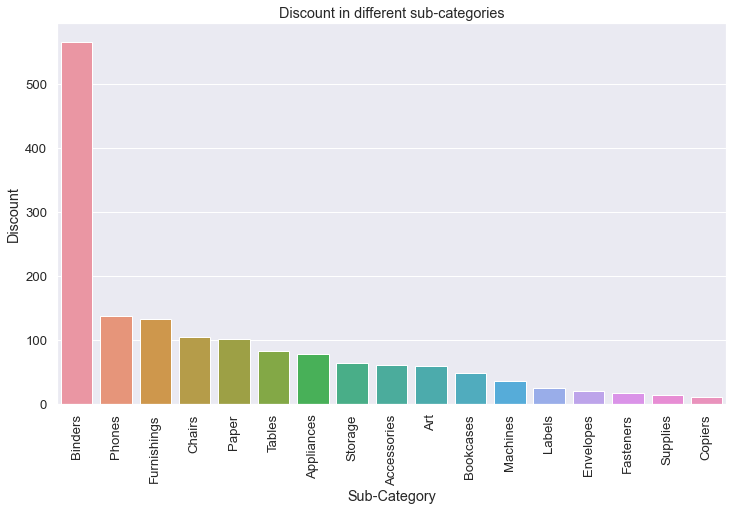

In [56]:
data_scategory_d= data_scategory.sort_values(by=['Discount'], ascending=False)

plt.figure(figsize = (12,7))
sns.set(font_scale=1.2, palette= "tab10")
ax=sns.barplot(data = data_scategory_d, x = "Sub-Category",y = "Discount")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Discount in different sub-categories')
plt.show()

In [57]:
data['Profit'].sum()

286241.4226

In [58]:
data['Sales'].sum()

2296195.5903

In [59]:
data['Discount'].sum()

1559.1900000000003

### Conclusions


**Total Sales**= 2,296,195.5903 USD \
**Total Profit**= 286,241.4226 USD \
**Total discounts**= 1559.19 USD 

**Insights into the loss:** \
 The main reason behind the loss is the high discount percentages provided. These provided in turn did not boost the sales too.   Thus less supply being sold for a much cheaper price led to the loss which mainly affected the furniture category in the   Central region. 
 \
 \
 Thus the discounts in the furniture category needs an immediate cut down.

**Discount vs Sales vs Profits:** 
1. Sales and Profit has positive correlation. Thats is, more the sales, more the profit. 
2. Discount does not increase the sales figures as expected. 
3. More discount leads to the decrease in the profits. 

**Sales:**
+ California and New York are performing very well in the bar of sales, thus continuous concentration into these states can    increase the sales, which in turn will boost the profit 
+ The sales figures look poor in states like North Dakota, West Virginia and Maine. These states sales strategy needs to be looked into. 
+ The sales in art and envelope is poor, but the profit in a comparative scale it good. Thus bumping up the sales in these sub-categories will bring more profits in the business. 
+ The technology business is doing very well both in sales and profit. So better investment scope for the category. 
+ The sales figures of the office supplies need a serious inspection. 
+ The poor profits of the furniture section can be handled but cutting down the discounts in the category. 